In [1]:
from sklearn.datasets import make_circles

In [2]:
# Make 1000 samples
n_samples=1000

In [3]:
#Create Labels and Features
X,y=make_circles(n_samples,noise=0.03,random_state=42)

Lets Visualize the data as it is hard to understand

In [4]:
import pandas as pd 

In [5]:
circles=pd.DataFrame({'X0':X[:,0],"X1":X[:,1],'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


Visualize it with  a Plot 

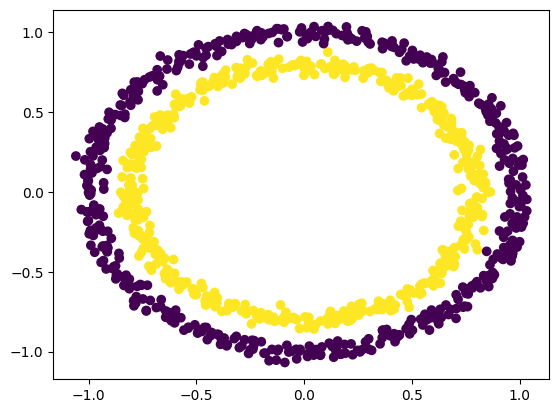

In [6]:
import matplotlib.pyplot as plt 
plt.scatter(circles["X0"],circles["X1"],c=y)
plt.show()

Second Way of Visualization

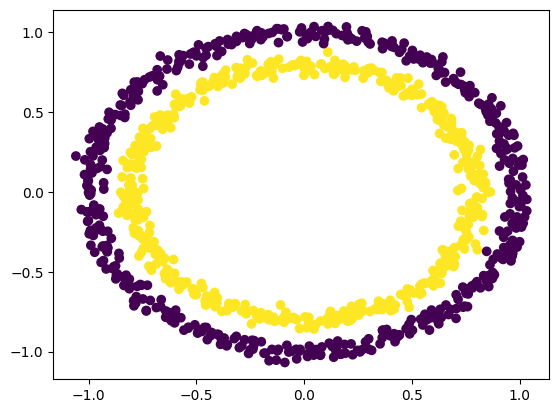

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [8]:
X.shape,y.shape

((1000, 2), (1000,))

In [9]:
len(X),len(y)

(1000, 1000)

Model Creation


In [10]:
import tensorflow as tf

In [11]:
tf.random.set_seed(42)
# Model 1 
model1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model1.fit(X,y,epochs=5,verbose=0)

In [12]:
model1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4940 - loss: 0.6971


[0.697107195854187, 0.49399998784065247]

Improve model by introducing a hidden a layer

In [13]:
tf.random.set_seed(42)
# Model 2 
model2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1),
])
model2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])
model2.fit(X,y,epochs=100,verbose=0)

In [14]:
model2.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5000 - loss: 0.6933


[0.6932628154754639, 0.5]

Again Try to improve again by changing optimizer , increasing hidden units and layers

In [15]:
tf.random.set_seed(42)
# Model3
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])
model3.fit(X,y,epochs=100,verbose=0)

In [16]:
model3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4880 - loss: 0.6952


[0.6952314972877502, 0.4880000054836273]

In [17]:
import numpy as np

In [18]:
def plot_decision_boundary(model,X,y):

    # Define axis boundraies for of the plot and create a meshgrid
    x_min,x_max=X[:,0].min()-0.1,X[:,1].max()+0.1
    y_min,y_max=X[:,1].min()+0.1,X[:,1].max()+0.1

    xx,yy=np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

    # Create X value to make predictions on these
    x_in=np.c_[xx.ravel(),yy.ravel()]   # Stacks 2d array together

    # Make Predictions
    y_pred=model.predict(x_in)
    
    # check for multi-class 
    if len(y_pred[0])>1:
        print('You are doing multi-class classification')
        # Reshape Predictions to get ready for plotting 
        y_pred=np.argmax(y_pred,axis=1).reshape(xx.shape)
    else:
        print("Doing Binary Classification")
        y_pred=np.round(y_pred).reshape(xx.shape)

    # Plot Decision boundry
    plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
    plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(yy.min(),yy.max())


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing Binary Classification


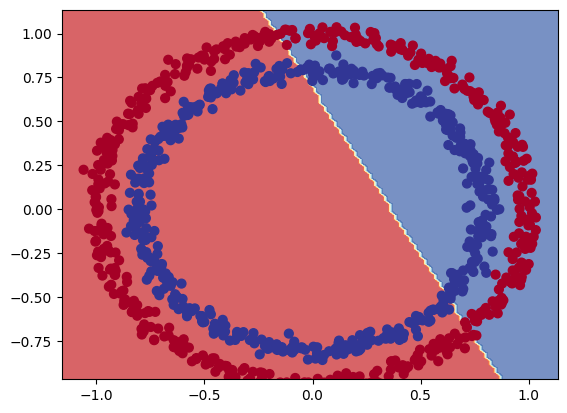

In [19]:
plot_decision_boundary(model3,X,y)

as our model is predicting a straight line 
lets try to fit it on straight data or linear data 


In [20]:
X_regression=tf.range(0,1000,5)
y_regression=tf.range(100,1100,5)
len(X_regression),len(y_regression)

(200, 200)

In [21]:
# Train Test Split

X_train_regression = tf.expand_dims(X_regression[:150], axis=-1)  # Shape: (150, 1)
X_test_regression  = tf.expand_dims(X_regression[150:], axis=-1)  # Shape: (50, 1)

y_train_regression=y_regression[:150]
y_test_regression=y_regression[150:]




In [22]:
tf.random.set_seed(42)
# Model3
model3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['mae'])
model3.fit(X_train_regression,y_train_regression,epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 544.7924 - mae: 544.7924
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 475.3592 - mae: 475.3592 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 418.2223 - mae: 418.2223
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 386.0712 - mae: 386.0712
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 358.8061 - mae: 358.8061
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 329.9167 - mae: 329.9167
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 299.6605 - mae: 299.6605
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 268.0269 - mae: 268.0269
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 234.9117 - mae: 234.9117
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 200.1660 - mae: 200.1660 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 162.5874 - mae: 162.5874 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 105.2095 - mae: 105.209

In [23]:
y_pred_reg=model3.predict(X_test_regression)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


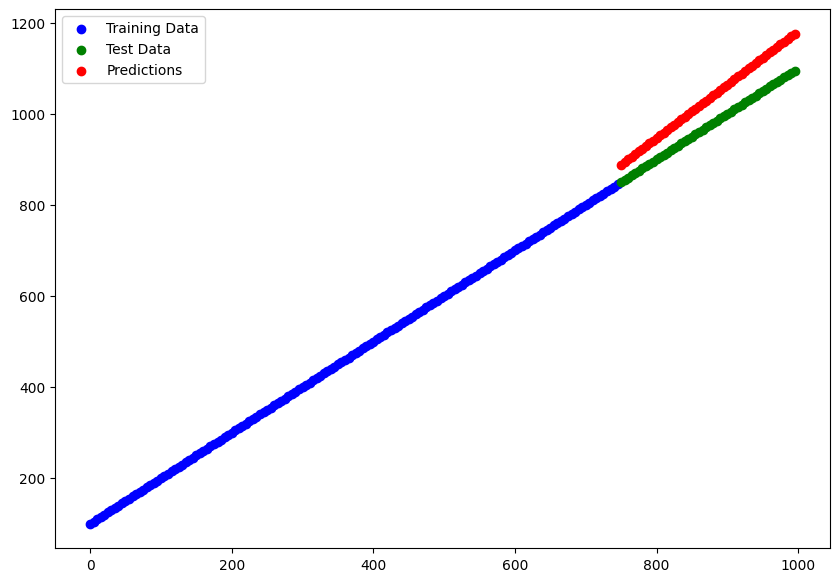

In [24]:
plt.figure(figsize=(10,7))
plt.scatter(X_train_regression,y_train_regression,c='b',label='Training Data')
plt.scatter(X_test_regression,y_test_regression,c='g',label='Test Data')
plt.scatter(X_test_regression,y_pred_reg,c='r',label='Predictions')
plt.legend();

In [25]:
tf.random.set_seed(42)
# Model3 Improvised
model3_improvised=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(20,activation='relu'),
    tf.keras.layers.Dense(10,activation='relu'),
    tf.keras.layers.Dense(1)
])
model3_improvised.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'])
model3_improvised.fit(X_train_regression,y_train_regression,epochs=230)

Epoch 1/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 358.6123 - mae: 358.6123
Epoch 2/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 129.1535 - mae: 129.1535
Epoch 3/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 83.4914 - mae: 83.4914 
Epoch 4/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 65.4977 - mae: 65.4977
Epoch 5/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 61.1271 - mae: 61.1271
Epoch 6/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 55.6824 - mae: 55.6824 
Epoch 7/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 50.9391 - mae: 50.9391
Epoch 8/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 45.6142 - mae: 45.6142
Epoch 9/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 44.2203 - mae: 44.2203 
Epoch 10/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 42.7644 - mae: 42.7644
Epoch 11/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 41.1379 - mae: 41.1379
Epoch 12/230
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 41.8249 - mae: 41.8249
Epoch 13/230
5/5 ━

In [26]:
y_pred_reg_improvised=model3_improvised.predict(X_test_regression)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/stepWARNING:tensorflow:6 out of the last 317 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000022CA743F380> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


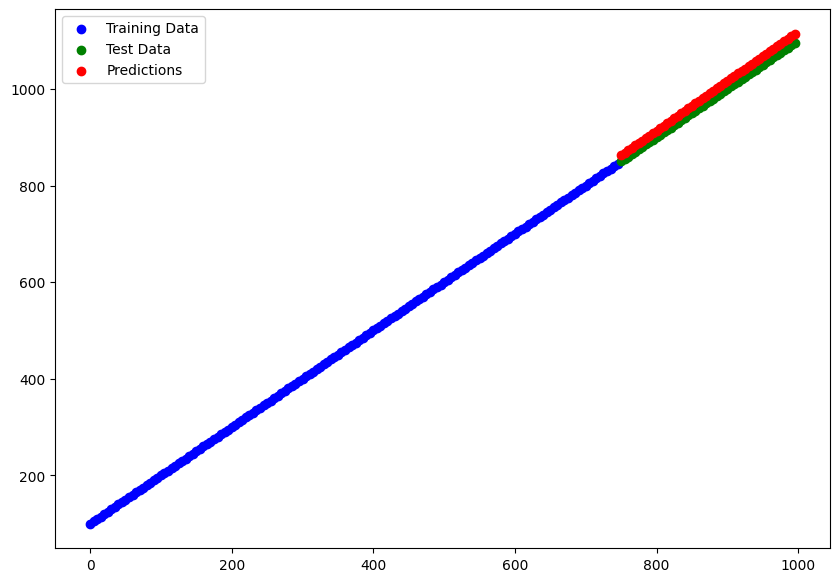

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(X_train_regression,y_train_regression,c='b',label='Training Data')
plt.scatter(X_test_regression,y_test_regression,c='g',label='Test Data')
plt.scatter(X_test_regression,y_pred_reg_improvised,c='r',label='Predictions')
plt.legend();

In [28]:
model3_improvised.evaluate(X_test_regression,y_test_regression)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 15.6408 - mae: 15.6408 


[15.640782356262207, 15.640782356262207]

**Lets now See Linearity and Non-linearity**
> Staright and Not-Straight Lines

Linear Model with linear activation

In [29]:
tf.random.set_seed(42)

model_4=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='linear')
])
model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
model_4.fit(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4800 - loss: 4.8520


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


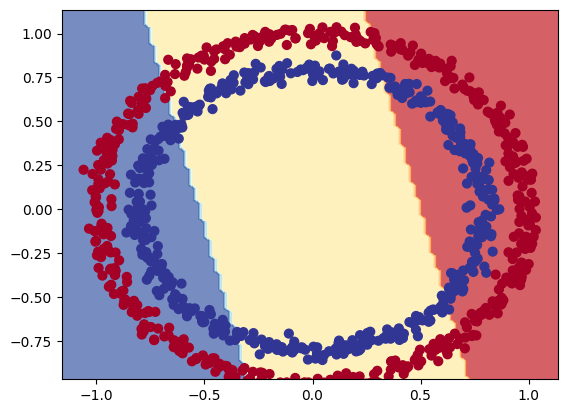

In [30]:
plot_decision_boundary(model_4,X,y)

First NN with non linear activation


In [32]:
tf.random.set_seed(42)

model5=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='relu'),
])
model5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model5.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4750 - loss: 4.9520
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4760 - loss: 4.8418
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4700 - loss: 4.7678
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4720 - loss: 4.7338
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4730 - loss: 4.7190
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4720 - loss: 4.6907
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4730 - loss: 4.6595
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4710 - loss: 4.6519
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4720 - loss: 4.6144
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4720 - loss: 4.6024
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4720 - loss: 4.5986
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy:

In [33]:
model5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4790 - loss: 3.6881


[3.6881027221679688, 0.4790000021457672]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Doing Binary Classification


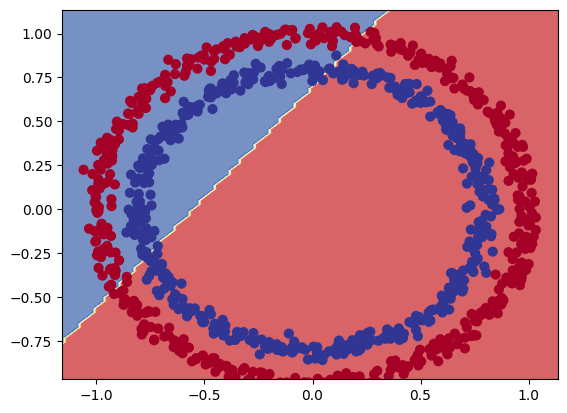

In [34]:
plot_decision_boundary(model5,X,y)

**As our model is still guessing so add more Layers with non linear activation**
* Add few more hidden layers 2 hidden layers
* Add few units like 4 units

In [35]:
tf.random.set_seed(42)

model6=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])
model6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])
model6.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5000 - loss: 8.0590
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy

In [36]:
model6.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5000 - loss: 8.0590


[8.059046745300293, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing Binary Classification


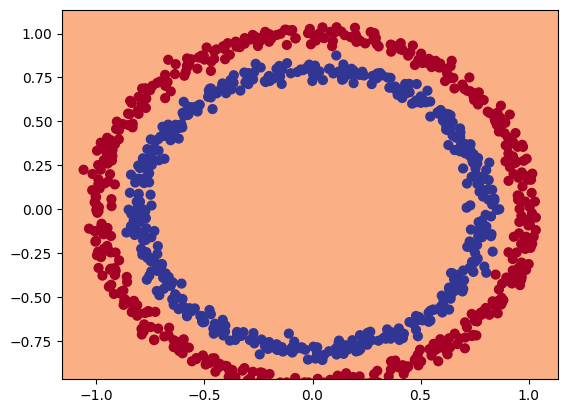

In [37]:
plot_decision_boundary(model6,X,y)

>Time To reveal our last trick in Bag 
* Added actiavtion sigmoid for last activation function

Last step to fix this now

In [46]:
tf.random.set_seed(42)
# Model Final
Final_model=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

Final_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=['accuracy'])
history=Final_model.fit(X,y,epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5030 - loss: 0.6914
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5330 - loss: 0.6864
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5300 - loss: 0.6841
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5350 - loss: 0.6826
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5430 - loss: 0.6806
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5450 - loss: 0.6793
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5530 - loss: 0.6782
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5550 - loss: 0.6770
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5570 - loss: 0.6757
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5590 - loss: 0.6744
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5640 - loss: 0.6730
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy

In [47]:
Final_model.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9970 - loss: 0.0115


[0.011479737237095833, 0.996999979019165]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Doing Binary Classification


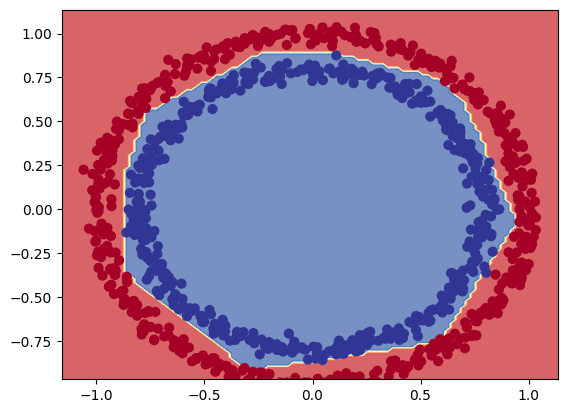

In [48]:
plot_decision_boundary(Final_model,X,y)